# Trend Analysis

## 1 - Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2 - Load Data

In [2]:
#Read the dataset.
df = pd.read_csv("../data/cleaned_data/cleaned_amazon_sales_dataset.csv")

Trend Analysis Function

In [45]:
def analyze_trends(df,column): 
    """

    Trend analysis for a given column (e.g., quantity_sold, total_revenue) across different time frames.
    
    """   
    #Daily analysis
    daily = df.groupby('order_date')[column].sum().reset_index()

    plt.figure(figsize=(15,5))
    sns.lineplot(data=daily, x='order_date', y=column)
    plt.title(f"Daily {column} Trend")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.show()

    #Weekly analysis
    df['week'] = df['order_date'].dt.isocalendar().week
    df['year'] = df['order_date'].dt.year
    weekly = df.groupby(['year','week'])[column].sum().reset_index()
    weekly['week_start'] = pd.to_datetime(weekly['year'].astype(str) + '-W' + weekly['week'].astype(str) + '-1', format='%Y-W%W-%w')

    plt.figure(figsize=(15,5))
    sns.lineplot(data=weekly, x='week_start', y=column)
    plt.title(f"Weekly {column} Trend")
    plt.xlabel("Week Start")
    plt.ylabel(column)
    plt.show()

    #Monthly analysis
    df['month'] = df['order_date'].dt.to_period('M')
    monthly = df.groupby('month')[column].sum().reset_index()
    monthly['month_start'] = monthly['month'].dt.to_timestamp()

    plt.figure(figsize=(15,5))
    sns.lineplot(data=monthly, x='month_start', y=column)
    plt.title(f"Monthly {column} Trend")
    plt.xlabel("Month")
    plt.ylabel(column)
    plt.show()

    #Seasonal analysis
    df['season'] = df['order_date'].dt.month%12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
    season_map = {1:'Winter',2:'Spring',3:'Summer',4:'Fall'}
    df['season'] = df['season'].map(season_map)
    seasonal = df.groupby('season')[column].sum().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(data=seasonal, x='season', y=column, order=['Winter','Spring','Summer','Fall'])
    plt.title(f"Seasonal {column} Trend")
    plt.xlabel("Season")
    plt.ylabel(column)
    plt.show()

    #Day of week analysis
    df['day_of_week'] = df['order_date'].dt.day_name()
    dow = df.groupby('day_of_week')[column].sum().reindex(
        ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    ).reset_index()

    plt.figure(figsize=(10,5))
    sns.barplot(data=dow, x='day_of_week', y=column)
    plt.title(f"{column} by Day of the Week")
    plt.xlabel("Day of Week")
    plt.ylabel(column                       )
    plt.show()

    # Weekend vs Weekday analysis
    df['is_weekend'] = df['order_date'].dt.dayofweek >= 5  # Saturday=5, Sunday=6
    weekend = df.groupby('is_weekend')[column].sum().reset_index()
    weekend['type'] = weekend['is_weekend'].map({False:'Weekday', True:'Weekend'})

    plt.figure(figsize=(6,4))
    sns.barplot(data=weekend, x='type', y=column)
    plt.title(f"{column}: Weekday vs Weekend")
    plt.xlabel("")
    plt.ylabel(column)
    plt.show()


Trend Analysis Based on quantity_sold

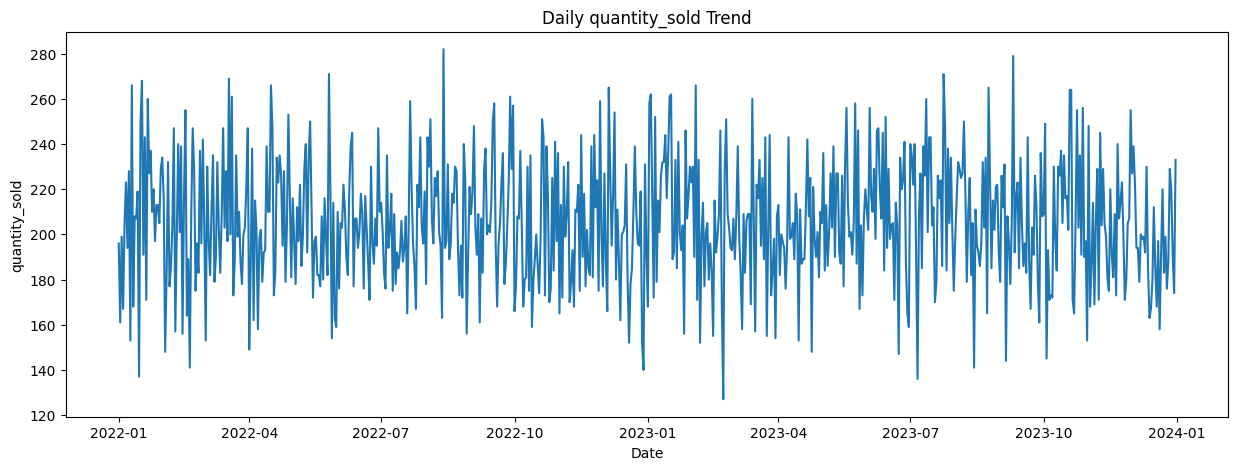

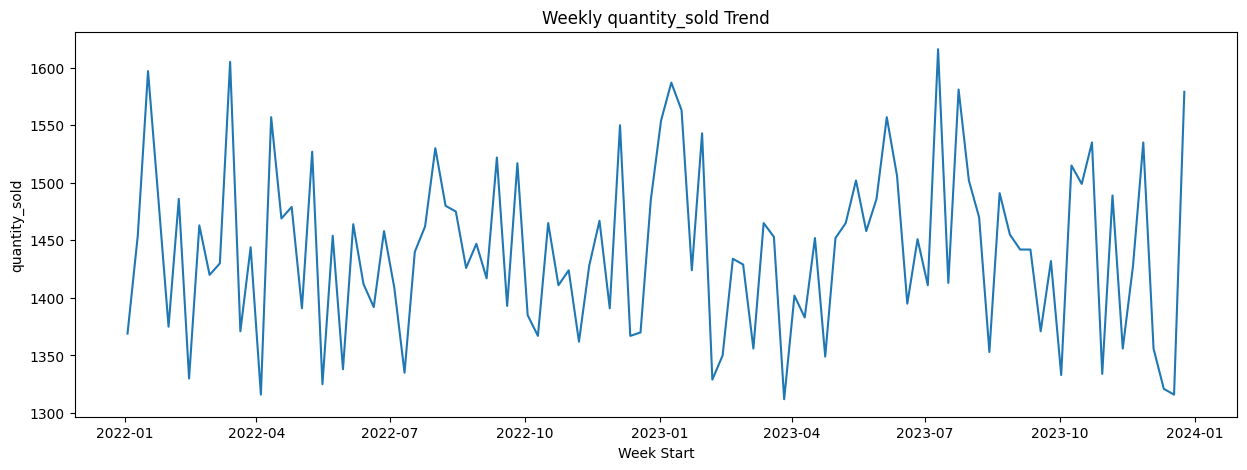

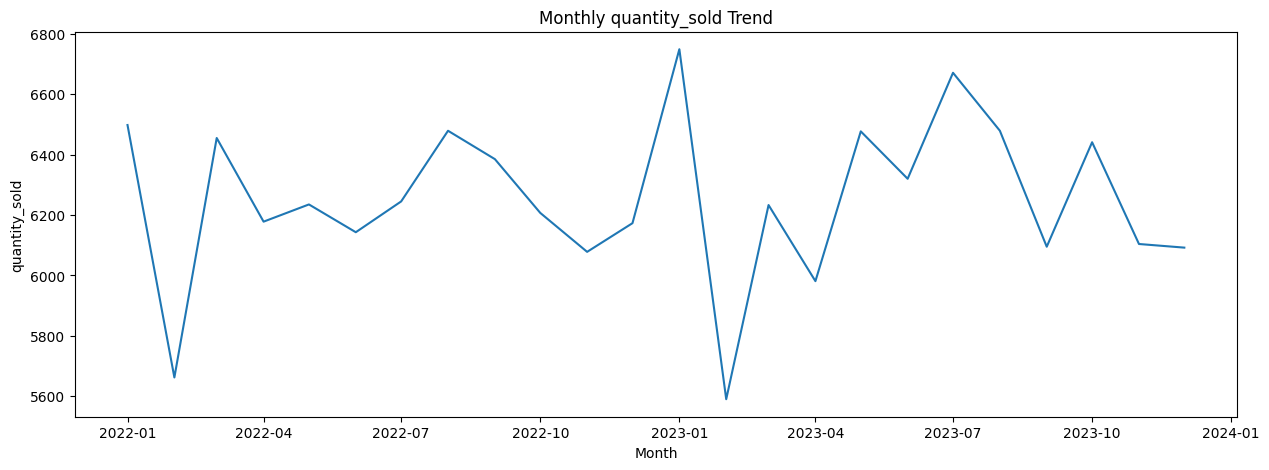

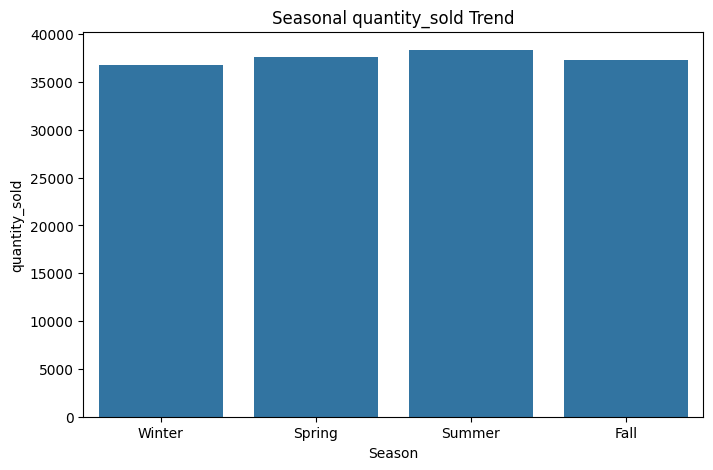

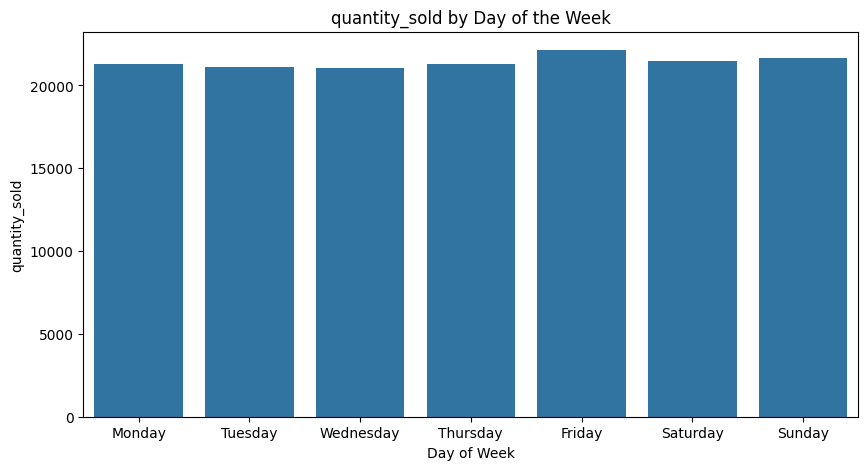

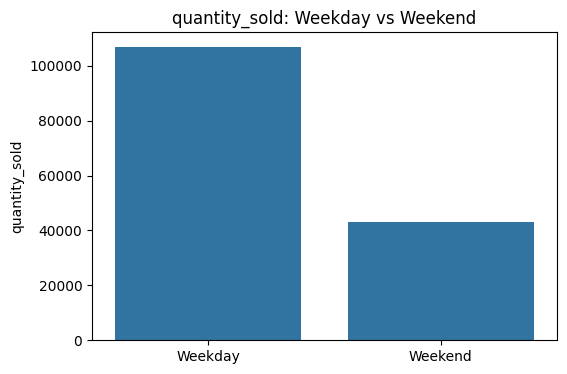

In [46]:

analyze_trends(df, "quantity_sold")

<Axes: >

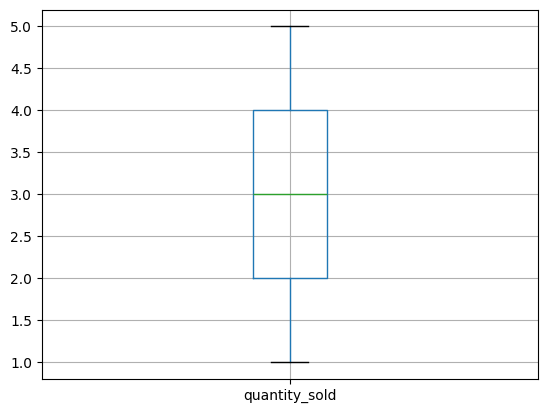

In [9]:
df.boxplot(column=[ "quantity_sold"])

Total Revenue Based Trend Analysis

<Axes: >

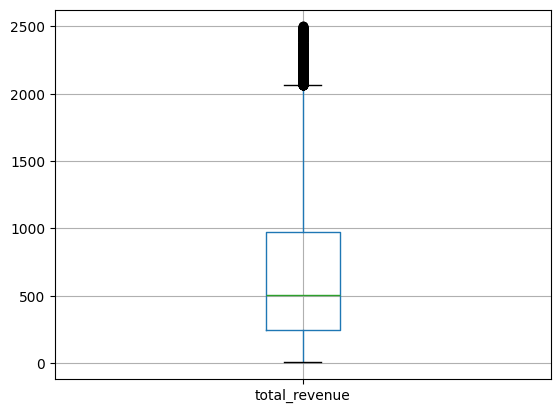

In [10]:
df.boxplot(column=[ "total_revenue"])

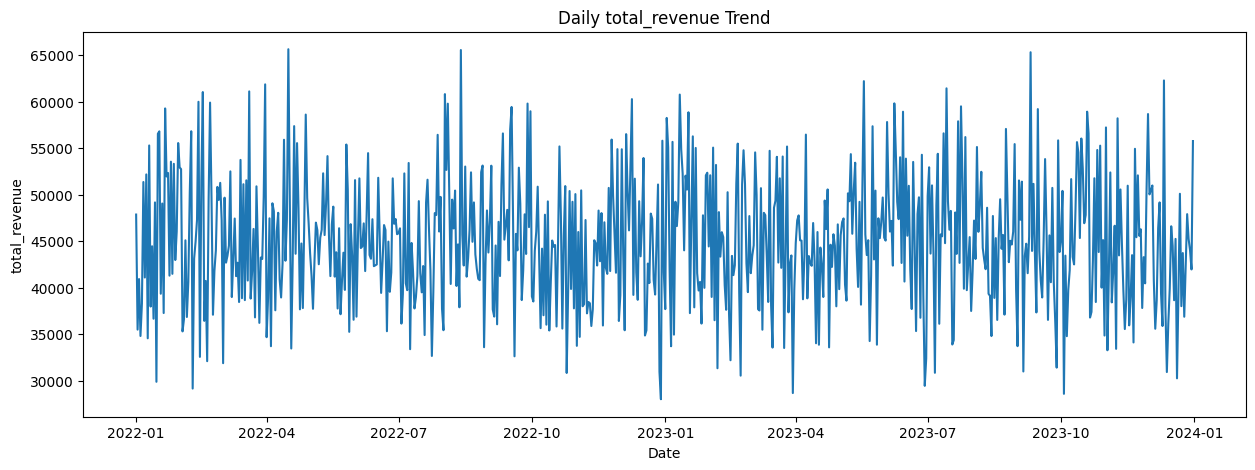

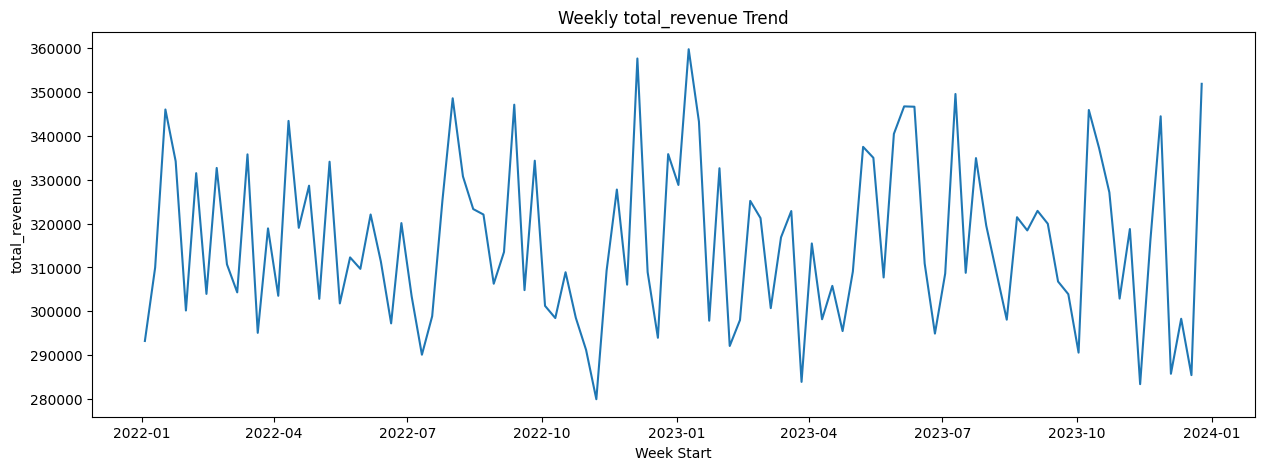

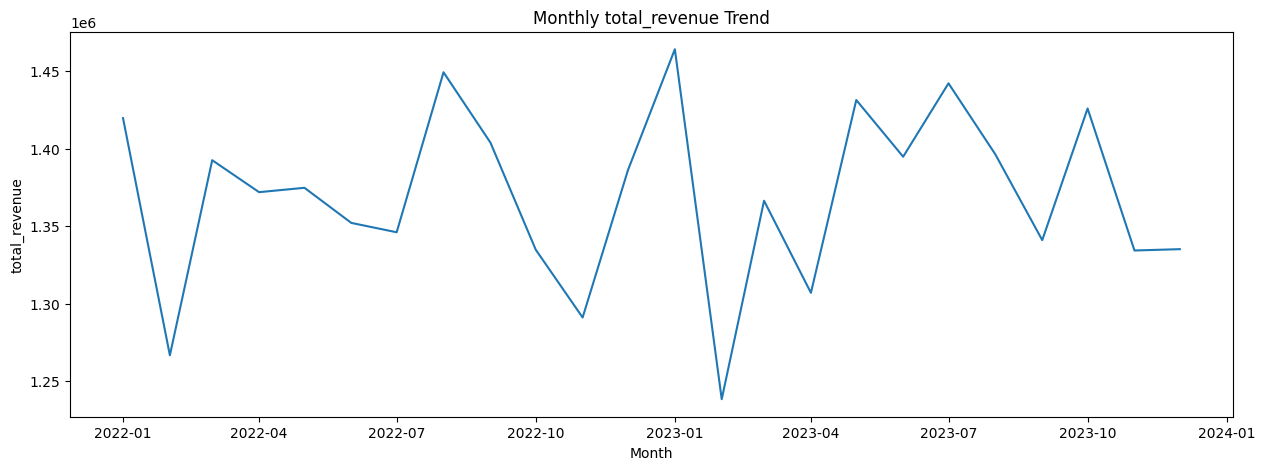

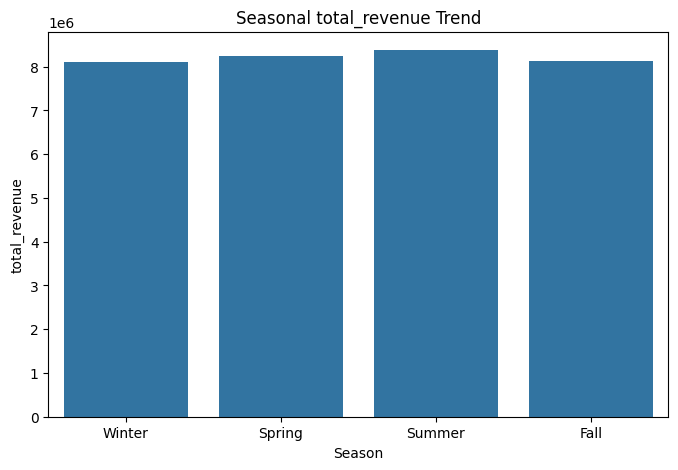

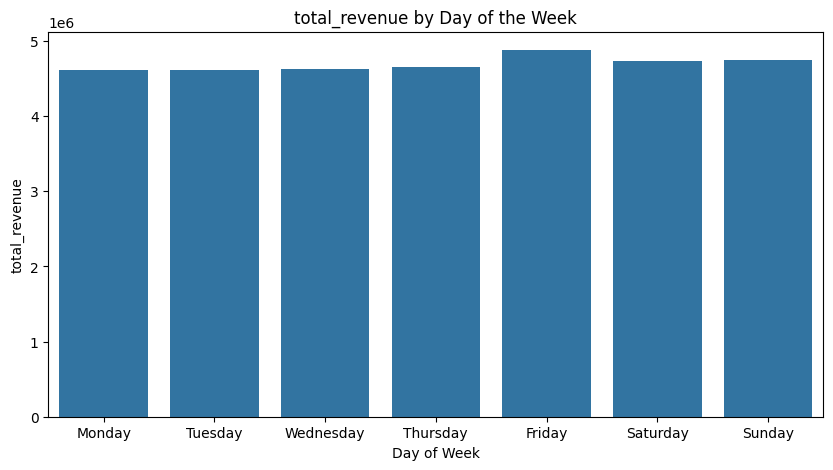

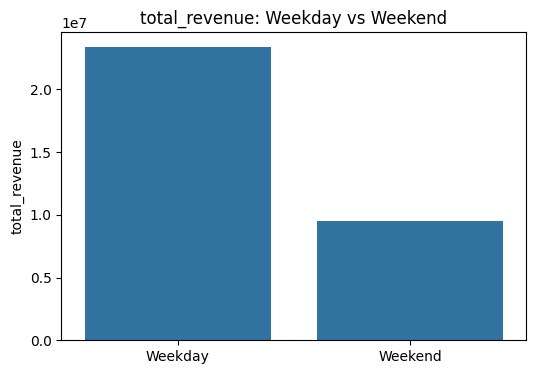

In [44]:
analyze_trends(df, "total_revenue")